In [1]:
import numpy as np
import pandas as pd
import statistics
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA 
from sklearn.metrics import mean_squared_error


In [2]:
#read file
df_data = pd.read_csv("data/dataset_mood_smartphone.csv")


In [3]:
prev_day="02-26"
new_data=pd.DataFrame(columns=['id', 'time', 'var',"value"])
temp_list=[]
for index, row in df_data.iterrows():
    date=row["time"].split(" ")[0]
    date=date.split("-")[1]+"-"+date.split("-")[2]
    if date != prev_day:
        new_data.loc[index]=[df_data.loc[index-1]["id"], prev_day , df_data.loc[index-1]["variable"], statistics.mean(temp_list)]
        temp_list=[row["value"]]
    else:
        temp_list.append(row["value"])
    prev_day=date

In [4]:
df_mood_id = new_data.loc[(new_data['var'] == "mood") & (new_data['id'] == "AS14.01")]
#df_mood_id = new_data.loc[new_data['var'] == "mood"]
df_time_value = df_mood_id[['time',"value"]]

#Set up the input for ARIMA
index = df_time_value[["time"]].values
data_np = df_time_value["value"].values
series = pd.Series(data_np, index=index)
X= series.values

In [5]:
X

array([6.25      , 6.33333333, 6.2       , 6.4       , 6.8       ,
       6.        , 6.75      , 6.6       , 7.        , 6.4       ,
       8.        , 7.5       , 7.4       , 6.        , 6.5       ,
       6.4       , 6.2       , 6.8       , 6.5       , 6.5       ,
       6.6       , 7.4       , 7.4       , 7.        , 7.25      ,
       8.        , 7.2       , 6.4       , 7.2       , 6.6       ,
       6.8       , 7.8       , 7.25      , 7.6       , 7.4       ,
       7.6       , 7.6       , 7.2       , 7.6       , 7.5       ,
       7.6       , 7.        , 7.8       , 8.        , 7.6       ,
       8.        , 8.        ])

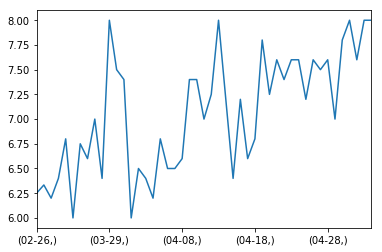

In [6]:
series.plot()
pyplot.show()

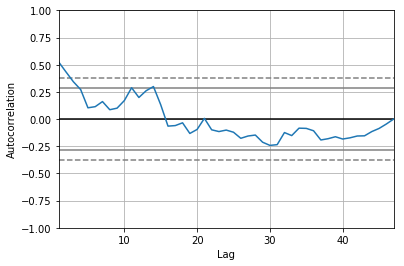

In [7]:
autocorrelation_plot(series)
#p value can be 2-3

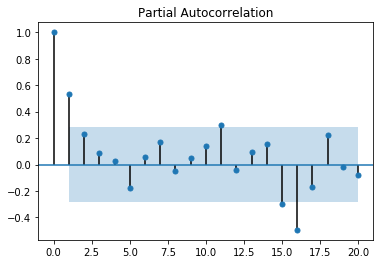

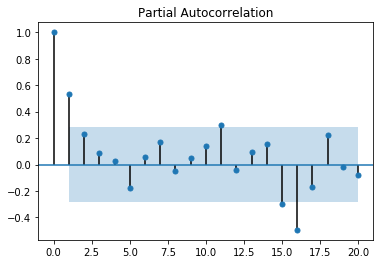

In [8]:
plot_pacf(series, lags=20)
#q value can be 2 or 3 or 4

In [9]:
#split the data set
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

history = [x for x in train]
predictions = list()
for t in range(len(test)):
    #order=(p,d,q) 
    model = ARIMA(history, order=(3,1,1))#tunne parameters!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=6.683811, expected=7.800000
predicted=7.369079, expected=7.250000
predicted=7.335601, expected=7.600000
predicted=7.366814, expected=7.400000
predicted=7.413353, expected=7.600000
predicted=7.457535, expected=7.600000
predicted=7.525775, expected=7.200000
predicted=7.428021, expected=7.600000
predicted=7.499884, expected=7.500000
predicted=7.560868, expected=7.600000
predicted=7.578805, expected=7.000000
predicted=7.453359, expected=7.800000
predicted=7.569717, expected=8.000000
predicted=7.776562, expected=7.600000
predicted=7.700626, expected=8.000000
predicted=7.777455, expected=8.000000
Test MSE: 0.146


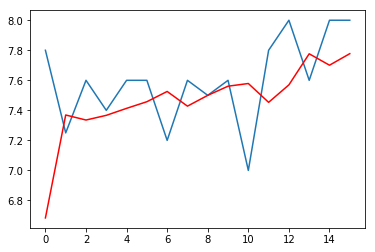

In [10]:
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()